## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0,0.2,0.4,0.6,0.8]

In [7]:
results = {}
for drop in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-DR-%s" % str(drop)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_______

50000/50000 [==============================] - 3s 50us/step - loss: 0.9959 - acc: 0.6497 - val_loss: 1.3413 - val_acc: 0.5380
Epoch 40/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.9852 - acc: 0.6541 - val_loss: 1.5637 - val_acc: 0.4805
Epoch 41/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9796 - acc: 0.6572 - val_loss: 1.4325 - val_acc: 0.5113
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9579 - acc: 0.6628 - val_loss: 1.3721 - val_acc: 0.5276
Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.9481 - acc: 0.6673 - val_loss: 1.4351 - val_acc: 0.5176
Epoch 44/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9357 - acc: 0.6725 - val_loss: 1.4427 - val_acc: 0.5108
Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9266 - acc: 0.6750 - val_loss: 1.3781 - val_acc: 0.5286
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 1.3406 - acc: 0.5223 - val_loss: 1.3418 - val_acc: 0.5239
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3302 - acc: 0.5263 - val_loss: 1.3396 - val_acc: 0.5278
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3285 - acc: 0.5256 - val_loss: 1.3491 - val_acc: 0.5193
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3178 - acc: 0.5306 - val_loss: 1.3321 - val_acc: 0.5277
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3111 - acc: 0.5352 - val_loss: 1.3337 - val_acc: 0.5294
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3011 - acc: 0.5387 - val_loss: 1.3351 - val_acc: 0.5274
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.2923 - acc: 0.5394 - val_loss: 1.3302 - val_acc: 0.5267
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 1.5614 - acc: 0.4425 - val_loss: 1.4556 - val_acc: 0.4855
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5449 - acc: 0.4489 - val_loss: 1.4521 - val_acc: 0.4828
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5417 - acc: 0.4499 - val_loss: 1.4441 - val_acc: 0.4856
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5388 - acc: 0.4501 - val_loss: 1.4387 - val_acc: 0.4912
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5264 - acc: 0.4521 - val_loss: 1.4346 - val_acc: 0.4887
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5255 - acc: 0.4557 - val_loss: 1.4343 - val_acc: 0.4905
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5218 - acc: 0.4565 - val_loss: 1.4324 - val_acc: 0.4880
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 51us/step - loss: 1.8434 - acc: 0.3253 - val_loss: 1.7184 - val_acc: 0.3938
Epoch 30/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8435 - acc: 0.3239 - val_loss: 1.7165 - val_acc: 0.3838
Epoch 31/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8358 - acc: 0.3283 - val_loss: 1.7122 - val_acc: 0.3893
Epoch 32/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8308 - acc: 0.3312 - val_loss: 1.6921 - val_acc: 0.3977
Epoch 33/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8287 - acc: 0.3324 - val_loss: 1.7007 - val_acc: 0.3953
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8208 - acc: 0.3356 - val_loss: 1.7036 - val_acc: 0.3968
Epoch 35/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8207 - acc: 0.3347 - val_loss: 1.6886 - val_acc: 0.3926
Epoch 36/50
50000/50000 [=====================

Epoch 26/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2861 - acc: 0.1262 - val_loss: 2.2802 - val_acc: 0.1709
Epoch 27/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.2803 - acc: 0.1305 - val_loss: 2.2735 - val_acc: 0.1754
Epoch 28/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2756 - acc: 0.1326 - val_loss: 2.2702 - val_acc: 0.1685
Epoch 29/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2685 - acc: 0.1369 - val_loss: 2.2552 - val_acc: 0.1736
Epoch 30/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2588 - acc: 0.1422 - val_loss: 2.2505 - val_acc: 0.1751
Epoch 31/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2552 - acc: 0.1407 - val_loss: 2.2293 - val_acc: 0.1788
Epoch 32/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2467 - acc: 0.1453 - val_loss: 2.2315 - val_acc: 0.1867
Epoch 33/50
50000/50000 [=========

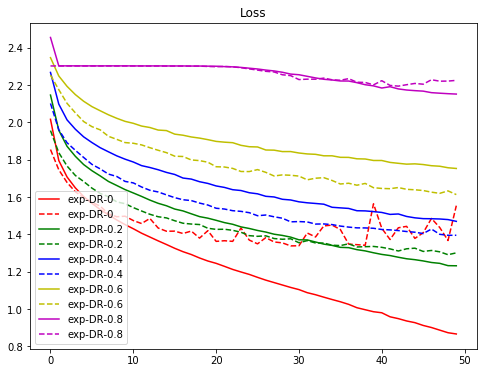

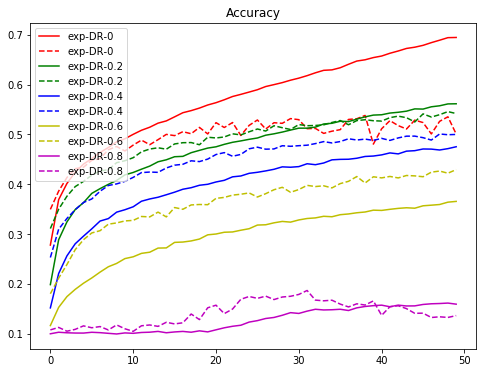

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Add more drop out layer

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0,0.2,0.4,0.6,0.8]

In [11]:
results = {}
for drop in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-DR-%s" % str(drop)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
__________

50000/50000 [==============================] - 3s 52us/step - loss: 0.9182 - acc: 0.6762 - val_loss: 1.4727 - val_acc: 0.5076
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9007 - acc: 0.6842 - val_loss: 1.5516 - val_acc: 0.4969
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8950 - acc: 0.6857 - val_loss: 1.3981 - val_acc: 0.5276
Epoch 50/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.8783 - acc: 0.6913 - val_loss: 1.4471 - val_acc: 0.5164
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0        

50000/50000 [==============================] - 3s 52us/step - loss: 1.4522 - acc: 0.4833 - val_loss: 1.3793 - val_acc: 0.5058
Epoch 44/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4529 - acc: 0.4800 - val_loss: 1.3812 - val_acc: 0.5047l
Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4434 - acc: 0.4854 - val_loss: 1.3800 - val_acc: 0.5039
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4434 - acc: 0.4826 - val_loss: 1.3804 - val_acc: 0.5050
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4381 - acc: 0.4869 - val_loss: 1.3710 - val_acc: 0.5104
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4247 - acc: 0.4888 - val_loss: 1.3688 - val_acc: 0.5099
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4215 - acc: 0.4912 - val_loss: 1.3621 - val_acc: 0.5104
Epoch 50/50
50000/50000 [====================

50000/50000 [==============================] - 3s 53us/step - loss: 1.9277 - acc: 0.2675 - val_loss: 1.8975 - val_acc: 0.2932
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9191 - acc: 0.2709 - val_loss: 1.8749 - val_acc: 0.3086
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9157 - acc: 0.2796 - val_loss: 1.8732 - val_acc: 0.3067
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9125 - acc: 0.2771 - val_loss: 1.8552 - val_acc: 0.3209
Epoch 42/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9091 - acc: 0.2819 - val_loss: 1.8549 - val_acc: 0.3128
Epoch 43/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9044 - acc: 0.2805 - val_loss: 1.8417 - val_acc: 0.3203
Epoch 44/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9034 - acc: 0.2851 - val_loss: 1.8382 - val_acc: 0.3296
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 53us/step - loss: 2.3026 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1020
Epoch 35/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3025 - val_acc: 0.1003
Epoch 36/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.3026 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1018
Epoch 37/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3026 - acc: 0.0997 - val_loss: 2.3025 - val_acc: 0.1038
Epoch 38/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3027 - acc: 0.1012 - val_loss: 2.3025 - val_acc: 0.1055
Epoch 39/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3028 - acc: 0.0966 - val_loss: 2.3025 - val_acc: 0.1032
Epoch 40/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3025 - acc: 0.0993 - val_loss: 2.3025 - val_acc: 0.1023
Epoch 41/50
50000/50000 [=====================

Epoch 30/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.4648 - acc: 0.0984 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.3799 - acc: 0.0991 - val_loss: 14.5063 - val_acc: 0.1000s: 7.3921 - acc: 0.0
Epoch 32/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.3349 - acc: 0.0978 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 53us/step - loss: 7.3736 - acc: 0.0994 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.3719 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.3096 - acc: 0.1007 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 7.3005 - acc: 0.1006 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3

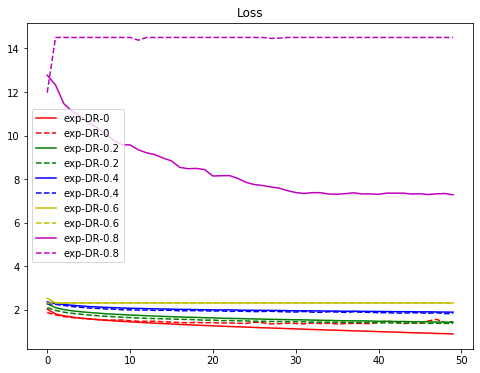

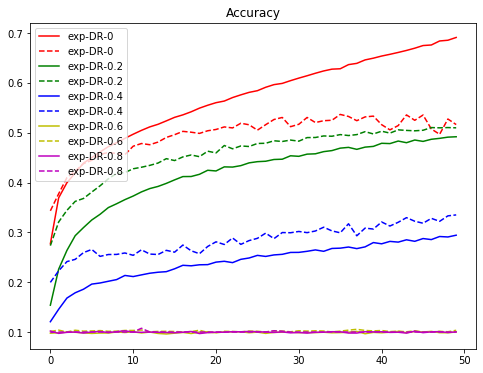

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Change optimizer(Adam)

In [13]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0,0.2,0.4,0.6,0.8]

In [15]:
results = {}
for drop in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-DR-%s" % str(drop)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_47 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
__________

Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.6547 - acc: 0.7683 - val_loss: 1.8034 - val_acc: 0.5052
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_50 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____

Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3890 - acc: 0.5002 - val_loss: 1.3828 - val_acc: 0.5067
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3875 - acc: 0.4976 - val_loss: 1.3913 - val_acc: 0.5049
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)               0        

Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7059 - acc: 0.3831 - val_loss: 1.6711 - val_acc: 0.4213
Epoch 49/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7123 - acc: 0.3803 - val_loss: 1.6631 - val_acc: 0.4301
Epoch 50/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7108 - acc: 0.3809 - val_loss: 1.6470 - val_acc: 0.4251
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_55 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131

Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.2499 - acc: 0.1341 - val_loss: 2.1686 - val_acc: 0.1702
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2483 - acc: 0.1340 - val_loss: 2.1641 - val_acc: 0.1834
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2472 - acc: 0.1346 - val_loss: 2.1731 - val_acc: 0.1645
Epoch 50/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.2475 - acc: 0.1345 - val_loss: 2.1604 - val_acc: 0.1781
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)            

Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3027 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000


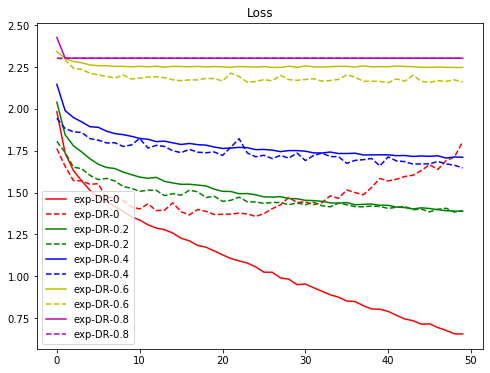

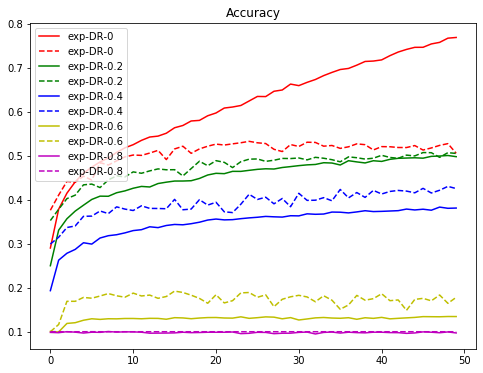

In [16]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()